In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [2]:
df = pd.read_csv("Netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Количество уникальных значений

In [4]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Пропущенные значения

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Предобработка данных

In [6]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['season_count'] = pd.to_numeric(df['season_count'])
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df['duration'] = pd.to_numeric(df['duration'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123.0,Dramas,A brilliant group of students become card-coun...,NaN


Перевод возрастных групп на три типа (дети, подростки, взрослые)

In [7]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
ratings_ages = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',    
    'PG': 'Kids',    
    'G': 'Kids',    
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Kids',
    'UR': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)

Визуализация

In [9]:
sns.set(style="darkgrid")

Отношение количества фильмов и сериалов

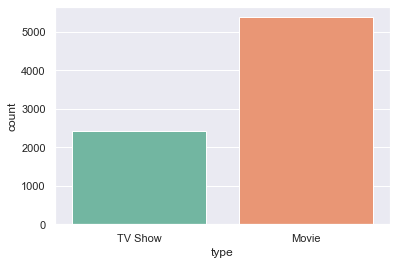

In [10]:
sns.countplot(x="type", data=df, palette="Set2")
plt.figsize = (10,10)
plt.show()

Распределение по возрасту (дети, подростки, взрослые)

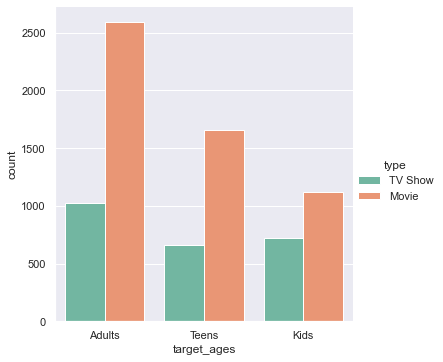

In [11]:
sns.catplot(x = "target_ages", hue = 'type', data = df, kind = 'count', palette="Set2")
plt.figsize = (10,10)
plt.show()

Количество выпущенных фильмов и сериалов по годам

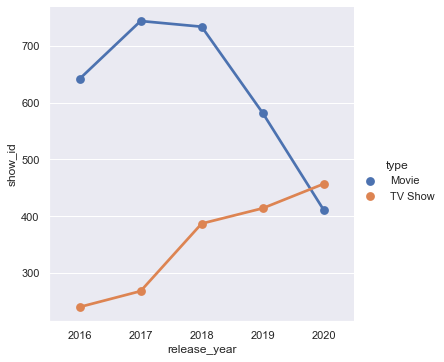

In [12]:
released_year_df = df.loc[(df['release_year'] > 2015) & (df['release_year'] < 2021)].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
sns.catplot(x = 'release_year', y = 'show_id', hue = 'type', data = released_year_df, kind = 'point')
plt.figsize = (10,10)
plt.show()

In [13]:
movie_df = df[df['type'] == 'Movie']
tvshow_df = df[df['type'] == 'TV Show']

График распределения продолжительности фильмов

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


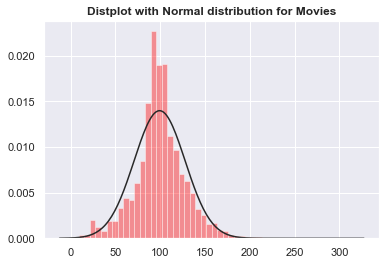

In [14]:
from scipy.stats import norm
plt.figsize = (10,10)
sns.distplot(movie_df['duration'].astype(str).str.extract('(\d+)'), fit=norm, kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

График продолжительности сериалов по количеству сезонов

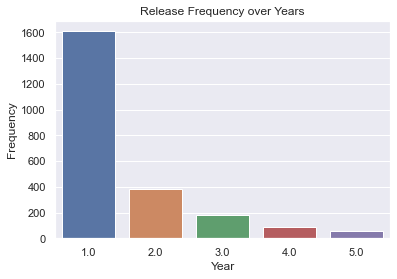

In [15]:
plt.figsize = (10,10)
sns.barplot(x = tvshow_df['season_count'].value_counts().index[:5], y = tvshow_df['season_count'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency over Years')
plt.show()

Самый продолжительный фильм

In [16]:
movie_df[movie_df['duration'] == movie_df['duration'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,target_ages
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312.0,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",NaN,Adults


Самый продолжительный сериал по количеству сезонов

In [17]:
tvshow_df[tvshow_df['season_count'] == tvshow_df['season_count'].max()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,target_ages
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,TV-14,NaN,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,16.0,Teens


Популярность жанров

In [18]:
from collections import Counter
genres=list(df['listed_in'])
temp=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        temp.append(j.replace(' ',""))
genre=Counter(temp)
genre={k: v for k, v in sorted(genre.items(), key=lambda item: item[1], reverse= True)}

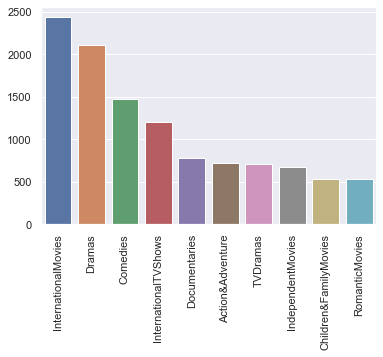

In [19]:
plt.figsize = (10,10)
sns.barplot(x = list(genre.keys())[:10], y = list(genre.values())[:10])
plt.xticks(rotation=90)
plt.show()

Популярность стран-производителей

In [20]:
from collections import Counter
countries=list(df['country'].dropna())
temp=[]

for i in countries:
    i=list(i.split(','))
    for j in i:
        temp.append(j.replace(' ',""))
country=Counter(temp)
country={k: v for k, v in sorted(country.items(), key=lambda item: item[1], reverse= True)}

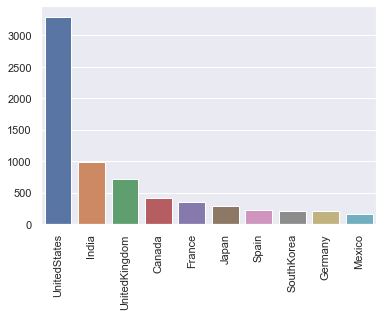

In [21]:
plt.figsize = (10,10)
sns.barplot(x = list(country.keys())[:10], y = list(country.values())[:10])
plt.xticks(rotation=90)
plt.show()